# Notebook Setup


In [4]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import Pypsy.signal
%matplotlib inline
plt.style.use('ggplot')

# Example Data

init!


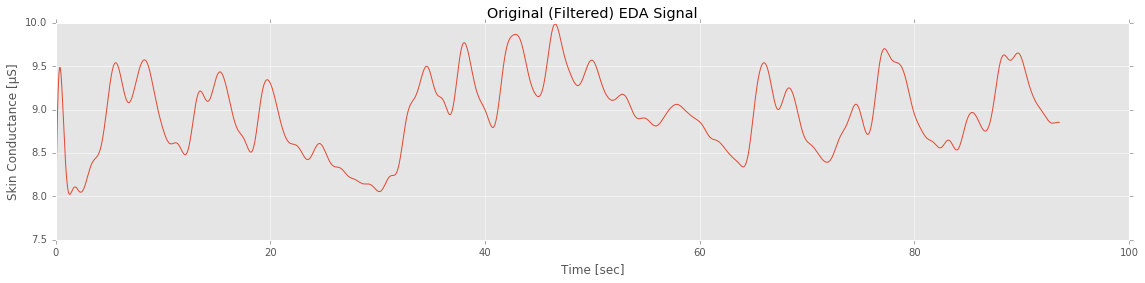

In [5]:
eda_dataframe = pd.DataFrame.from_csv('eda.csv')
eda_dataframe.timestamp = eda_dataframe.timestamp / 1000.
eda_dataframe.head()

timestamps = eda_dataframe.timestamp
eda = eda_dataframe.eda_filtered

eda_signal = Pypsy.signal.EDASignal(eda, timestamps)

fig = plt.figure(figsize=(16,4))
plt.plot(eda_signal.time, eda_signal.data)
plt.title('Original (Filtered) EDA Signal')
plt.xlabel('Time [sec]')
plt.ylabel('Skin Conductance [µS]')
plt.tight_layout();

# Decomposition

## Initial Decomposition

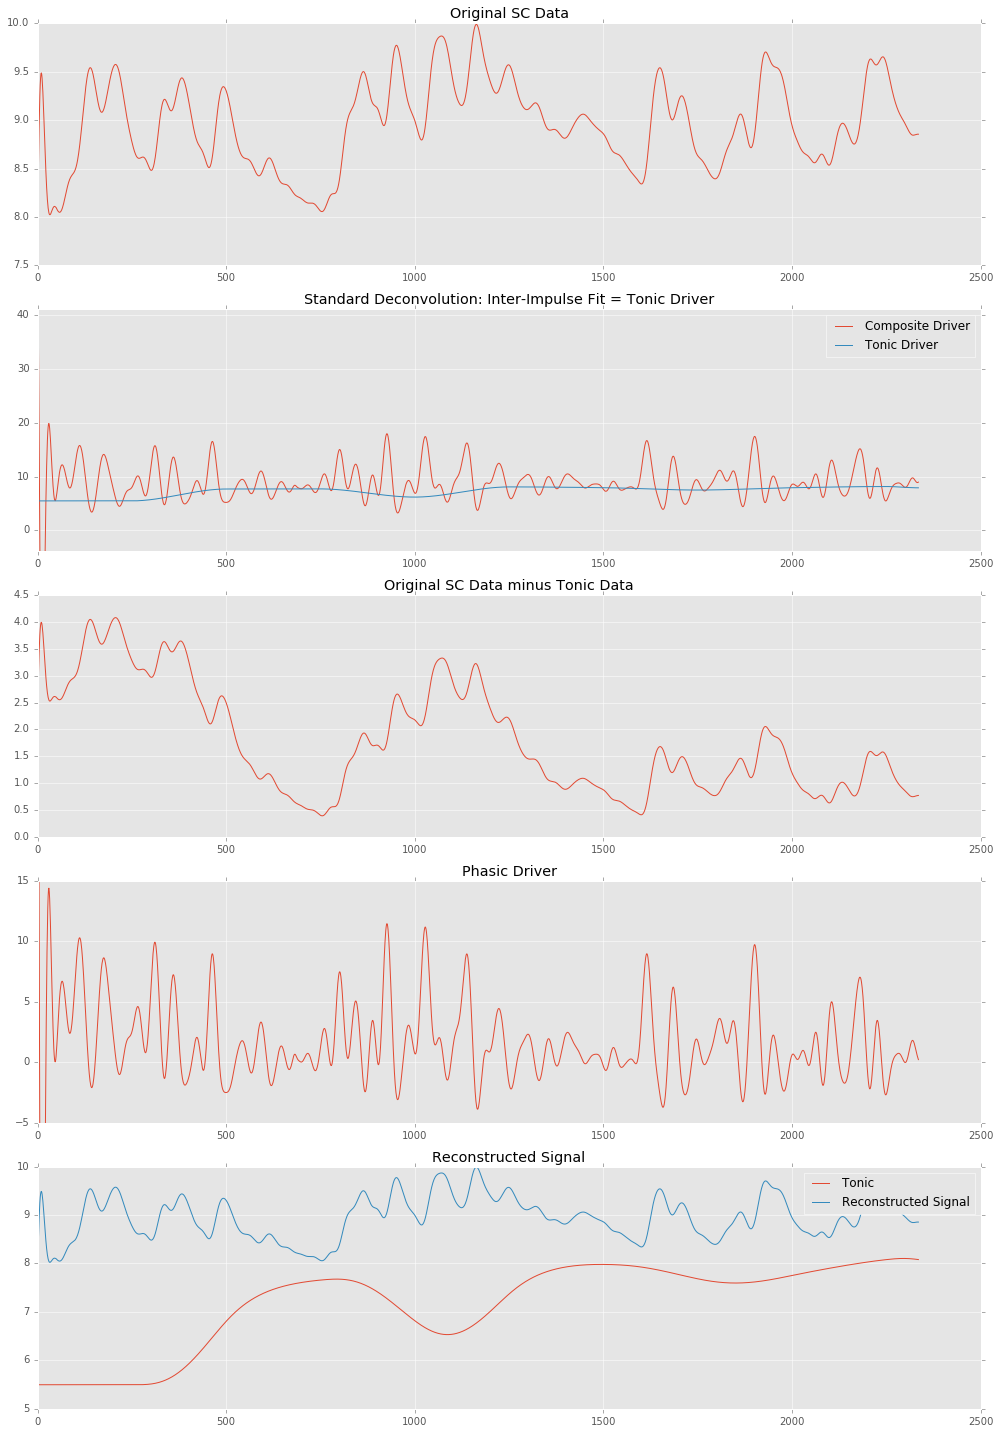

In [6]:
eda_signal.decompose_signal(optimize=False)

fig = plt.figure(figsize=(14,20))

ax1 = fig.add_subplot(511)
plt.plot(eda_signal.data)
plt.title('Original SC Data')

ax2 = fig.add_subplot(512)
plt.plot(eda_signal.composite_driver, label='Composite Driver')
plt.plot(eda_signal.tonic_driver, label='Tonic Driver')
plt.legend()
med = np.median(eda_signal.composite_driver + eda_signal.tonic_driver)
plt.ylim([med - 20, med + 25])
plt.title('Standard Deconvolution: Inter-Impulse Fit = Tonic Driver')


ax3 = fig.add_subplot(513)
plt.plot(eda_signal.data - eda_signal.tonic_data)
plt.title('Original SC Data minus Tonic Data')

ax4 = fig.add_subplot(514)
plt.plot(eda_signal.phasic_driver)
plt.ylim([-5,15])
plt.title('Phasic Driver')

ax5 = fig.add_subplot(515)
plt.plot(eda_signal.tonic_data, label='Tonic')
# plt.plot(eda_signal.phasic_data, label='Phasic')
plt.plot(eda_signal.phasic_data + eda_signal.tonic_data, label='Reconstructed Signal')
plt.title('Reconstructed Signal')
plt.legend()

plt.tight_layout();

## Optimized Decomposition

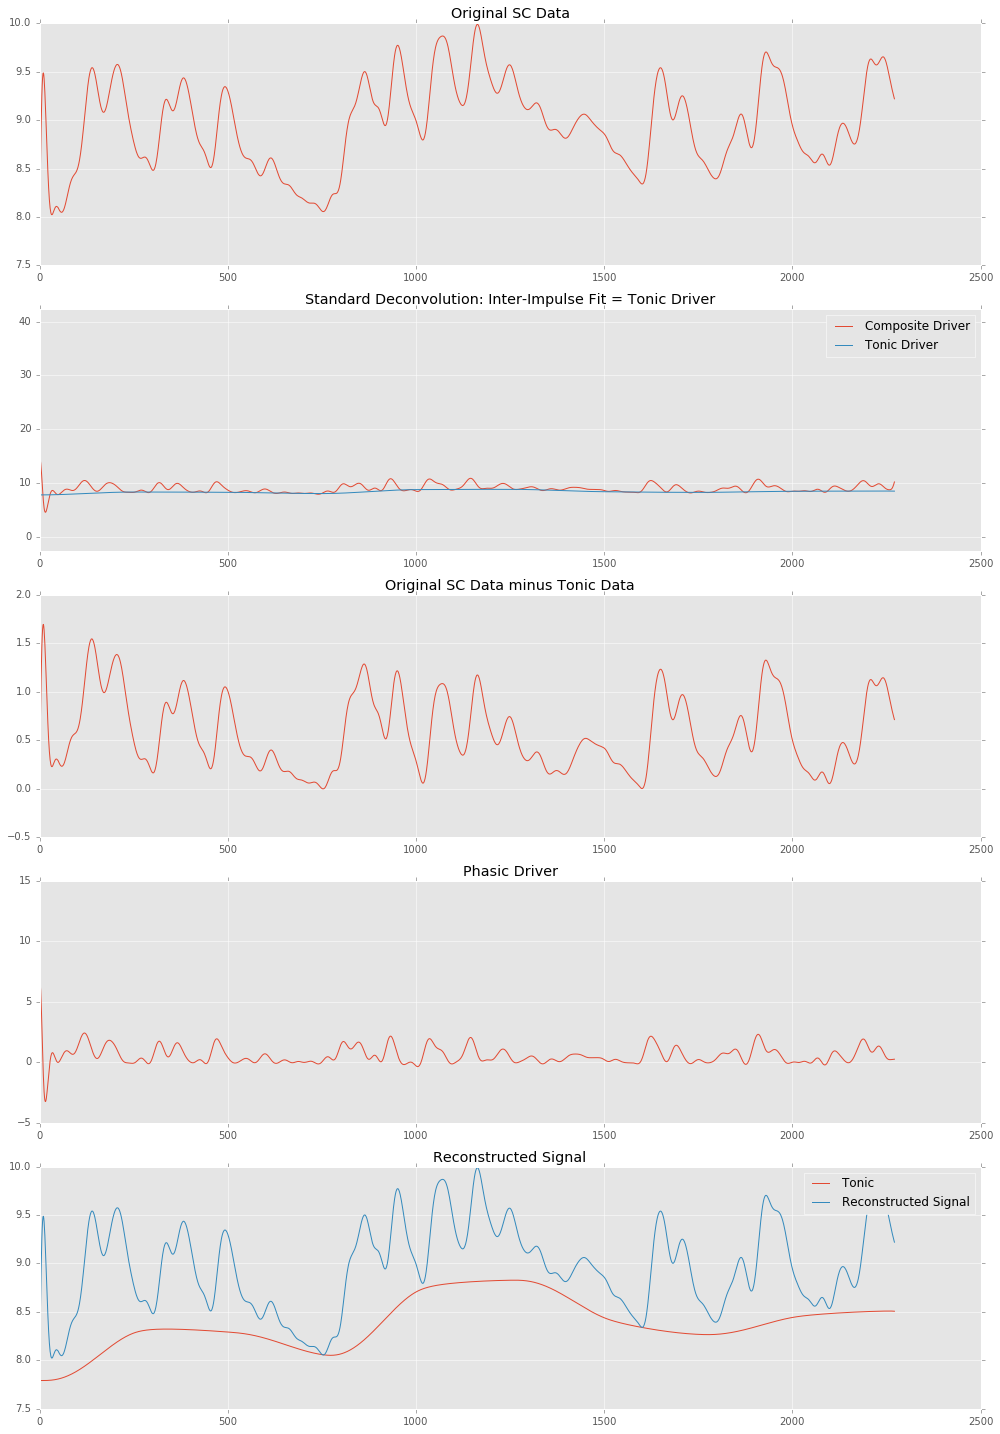

In [7]:
eda_signal.decompose_signal(optimize=True)

fig = plt.figure(figsize=(14,20))

ax1 = fig.add_subplot(511)
plt.plot(eda_signal.data)
plt.title('Original SC Data')

ax2 = fig.add_subplot(512)
plt.plot(eda_signal.composite_driver, label='Composite Driver')
plt.plot(eda_signal.tonic_driver, label='Tonic Driver')
plt.legend()

med = np.median(eda_signal.composite_driver + eda_signal.tonic_driver)
plt.ylim([med - 20, med + 25])
plt.title('Standard Deconvolution: Inter-Impulse Fit = Tonic Driver')


ax3 = fig.add_subplot(513)
plt.plot(eda_signal.data - eda_signal.tonic_data)
plt.title('Original SC Data minus Tonic Data')

ax4 = fig.add_subplot(514)
plt.plot(eda_signal.phasic_driver)
plt.ylim([-5,15])
plt.title('Phasic Driver')

ax5 = fig.add_subplot(515)
plt.plot(eda_signal.tonic_data, label='Tonic')
# plt.plot(eda_signal.phasic_data, label='Phasic')
plt.plot(eda_signal.phasic_data + eda_signal.tonic_data, label='Reconstructed Signal')
plt.title('Reconstructed Signal')
plt.legend()

plt.tight_layout()

In [9]:
eda_signal.error

{'MSE': 0.0,
 'RMSE': 0.0,
 'compound': 2.4200381647562459,
 'discreteness': 1.3990669014084507,
 'negativity': 0.20419425266955898}

In [24]:
eda_signal.original_data.size

4675